# 日経平均株価と幻のSQ（高値）との関係

## 動機

9 月 13 日に算出された日経平均の SQ 値は 36,906.92 円と、その日のザラ場の日経平均株価の高値 36,887.40 円より高値になりました。

ザラ場で株価を実現していない場合、幻の SQ 値と呼ぶそうですが、ラジオ日経のマーケットプレスでの話では、高値より高い幻の SQ 値を付けたときは、経験上、その後下降トレンドになることが多いと聞きました。

気になって、月足のチャートと過去の SQ 値（x 点）を重ねてみました。なお、9 月分の月足は月末ではないので未確定です。

In [14]:
import datetime as dt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(start='2019-01-01', end='2024-10-01', interval='1mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01 00:00:00+09:00,19655.130859,20892.679688,19241.369141,20773.490234,1275600000,0.0,0.0
2019-02-01 00:00:00+09:00,20797.029297,21610.880859,20315.310547,21385.160156,1276100000,0.0,0.0
2019-03-01 00:00:00+09:00,21490.019531,21860.390625,20911.570312,21205.810547,1396900000,0.0,0.0
2019-04-01 00:00:00+09:00,21500.890625,22362.919922,21471.119141,22258.730469,1187800000,0.0,0.0
2019-05-01 00:00:00+09:00,22184.400391,22190.490234,20581.580078,20601.189453,1458100000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-01 00:00:00+09:00,38107.378906,39437.160156,37617.000000,38487.898438,2632400000,0.0,0.0
2024-06-01 00:00:00+09:00,38734.949219,39788.628906,37950.199219,39583.078125,2209000000,0.0,0.0
2024-07-01 00:00:00+09:00,39839.820312,42426.769531,37611.191406,39101.820312,2570500000,0.0,0.0


SQ値は下記からダウンロードして転写

https://www.jpx.co.jp/markets/derivatives/special-quotation/index.html

In [15]:
sqfile = 'SQ.csv'
df_sq = pd.read_csv(sqfile)
df_sq

,Month,Nikkei225
0,2019-01-01,20290.67
1,2019-02-01,20481.02
2,2019-03-01,21348.40
3,2019-04-01,21870.84
4,2019-05-01,21451.91
...,...,...
64,2024-05-01,38509.47
65,2024-06-01,38535.35
66,2024-07-01,41531.26
67,2024-08-01,35661.68


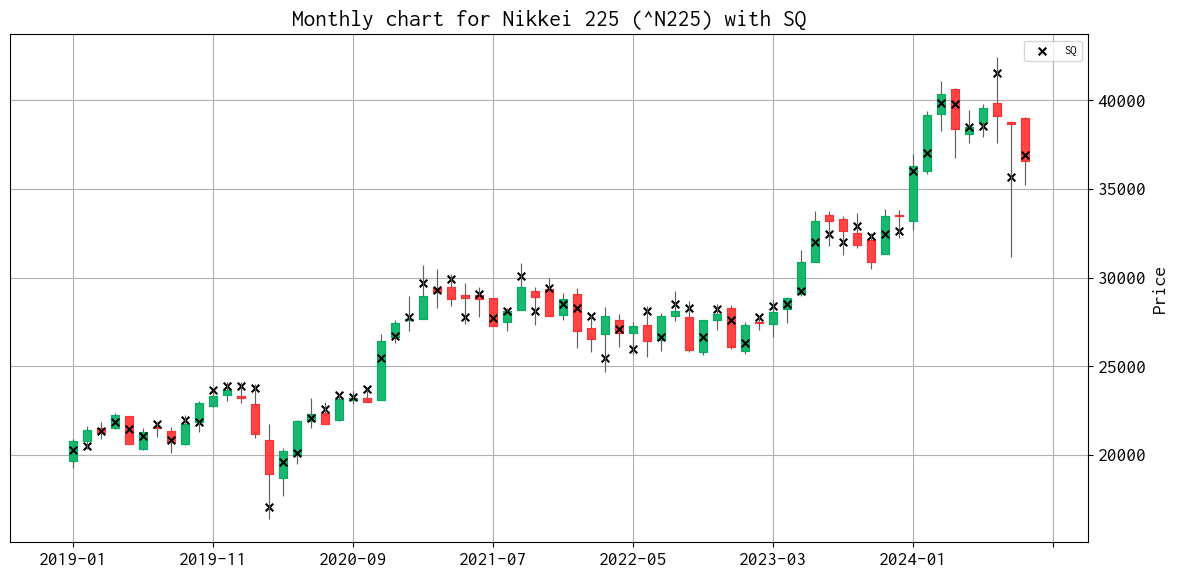

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_sq['Nikkei225'], type='scatter', color='black', marker='x', markersize=30, label='SQ', ax=ax),
]

mpf.plot(
    df,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Monthly chart for %s (%s) with SQ' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('monthly_chart_n225_sq.png')
plt.show()

しかし、月足では何だかよくわかりません。

過去の日経平均の日足のデータを入手できるので、ちょっと手間がかかりましたが、**SQ 算出日の日経平均株価の高値より SQ 値の方が高かった場合** に x をつけてみました。

日足チャートだと細かくて見えにくいので、2019 年から一年ずつプロットしました。

In [17]:
df_day = ticker.history(start='2019-01-01', end='2024-10-01', interval='1d')
df_day

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-04 00:00:00+09:00,19655.130859,19692.580078,19241.369141,19561.960938,91600000,0.0,0.0
2019-01-07 00:00:00+09:00,19944.609375,20266.220703,19920.800781,20038.970703,81500000,0.0,0.0
2019-01-08 00:00:00+09:00,20224.669922,20347.919922,20106.359375,20204.039062,86400000,0.0,0.0
2019-01-09 00:00:00+09:00,20366.300781,20494.349609,20331.199219,20427.060547,72800000,0.0,0.0
2019-01-10 00:00:00+09:00,20270.880859,20345.919922,20101.929688,20163.800781,73700000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00+09:00,35805.820312,36248.121094,35247.871094,36215.750000,118200000,0.0,0.0
2024-09-10 00:00:00+09:00,36386.121094,36537.031250,36001.578125,36159.160156,112300000,0.0,0.0
2024-09-11 00:00:00+09:00,36029.898438,36056.871094,35253.429688,35619.769531,127600000,0.0,0.0


In [18]:
r_max = len(df_day)
df_day['SQ'] = [np.nan] * r_max
df_day

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SQ
Date,,,,,,,,
2019-01-04 00:00:00+09:00,19655.130859,19692.580078,19241.369141,19561.960938,91600000,0.0,0.0,NaN
2019-01-07 00:00:00+09:00,19944.609375,20266.220703,19920.800781,20038.970703,81500000,0.0,0.0,NaN
2019-01-08 00:00:00+09:00,20224.669922,20347.919922,20106.359375,20204.039062,86400000,0.0,0.0,NaN
2019-01-09 00:00:00+09:00,20366.300781,20494.349609,20331.199219,20427.060547,72800000,0.0,0.0,NaN
2019-01-10 00:00:00+09:00,20270.880859,20345.919922,20101.929688,20163.800781,73700000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00+09:00,35805.820312,36248.121094,35247.871094,36215.750000,118200000,0.0,0.0,NaN
2024-09-10 00:00:00+09:00,36386.121094,36537.031250,36001.578125,36159.160156,112300000,0.0,0.0,NaN
2024-09-11 00:00:00+09:00,36029.898438,36056.871094,35253.429688,35619.769531,127600000,0.0,0.0,NaN


## 過去のSQ値と、その日の高値との比較

当月の第二金曜日の日付を計算。ただし、日足データにその日付が存在しない場合は祭日とみなし、一日前の高値と比較した。

In [19]:
index_date = list()
for t in df_sq['Month']:
    dt_first = pd.to_datetime('%s 00:00:00+09:00' % t)
    if dt_first.weekday() == 0:
        delta = dt.timedelta(days=11)
    elif dt_first.weekday() == 1:
        delta = dt.timedelta(days=10)
    elif dt_first.weekday() == 2:
        delta = dt.timedelta(days=9)
    elif dt_first.weekday() == 3:
        delta = dt.timedelta(days=8)
    elif dt_first.weekday() == 4:
        delta = dt.timedelta(days=7)
    elif dt_first.weekday() == 5:
        delta = dt.timedelta(days=13)
    else:
        delta = dt.timedelta(days=12)

    dt_fri = dt_first + delta
    index_date.append(dt_fri)
df_sq.index = index_date
df_sq

,Month,Nikkei225
2019-01-11 00:00:00+09:00,2019-01-01,20290.67
2019-02-08 00:00:00+09:00,2019-02-01,20481.02
2019-03-08 00:00:00+09:00,2019-03-01,21348.40
2019-04-12 00:00:00+09:00,2019-04-01,21870.84
2019-05-10 00:00:00+09:00,2019-05-01,21451.91
...,...,...
2024-05-10 00:00:00+09:00,2024-05-01,38509.47
2024-06-14 00:00:00+09:00,2024-06-01,38535.35
2024-07-12 00:00:00+09:00,2024-07-01,41531.26
2024-08-09 00:00:00+09:00,2024-08-01,35661.68


In [20]:
day1 = dt.timedelta(days=1)
ser_sq = df_day['SQ'].copy()
for t in df_sq.index:
    sq = df_sq.loc[t]['Nikkei225']
    try:
        high = df_day.loc[t]['High']
    except KeyError:
        t = t - day1
        high = df_day.loc[t]['High']
    if sq > high:
        print(t, 'High =', high, '< SQ =', sq)
        ser_sq.loc[t] = sq
df_day['SQ'] = ser_sq
df_day

2019-07-12 00:00:00+09:00 High = 21720.140625 < SQ = 21742.57
2019-08-09 00:00:00+09:00 High = 20782.060546875 < SQ = 20855.99
2019-10-11 00:00:00+09:00 High = 21820.76953125 < SQ = 21842.63
2019-11-08 00:00:00+09:00 High = 23591.08984375 < SQ = 23637.93
2020-02-14 00:00:00+09:00 High = 23738.419921875 < SQ = 23744.71
2020-04-10 00:00:00+09:00 High = 19500.0703125 < SQ = 19577.48
2020-07-10 00:00:00+09:00 High = 22563.6796875 < SQ = 22601.81
2020-08-14 00:00:00+09:00 High = 23338.7890625 < SQ = 23350.79
2020-11-13 00:00:00+09:00 High = 25456.1796875 < SQ = 25480.28
2021-02-12 00:00:00+09:00 High = 29650.509765625 < SQ = 29718.77
2021-08-13 00:00:00+09:00 High = 28070.0 < SQ = 28093.15
2022-01-14 00:00:00+09:00 High = 28252.9609375 < SQ = 28266.57
2022-06-10 00:00:00+09:00 High = 28044.44921875 < SQ = 28122.81
2023-04-14 00:00:00+09:00 High = 28515.509765625 < SQ = 28519.43
2023-09-08 00:00:00+09:00 High = 32920.4296875 < SQ = 32921.39
2023-12-08 00:00:00+09:00 High = 32604.349609375 < 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SQ
Date,,,,,,,,
2019-01-04 00:00:00+09:00,19655.130859,19692.580078,19241.369141,19561.960938,91600000,0.0,0.0,NaN
2019-01-07 00:00:00+09:00,19944.609375,20266.220703,19920.800781,20038.970703,81500000,0.0,0.0,NaN
2019-01-08 00:00:00+09:00,20224.669922,20347.919922,20106.359375,20204.039062,86400000,0.0,0.0,NaN
2019-01-09 00:00:00+09:00,20366.300781,20494.349609,20331.199219,20427.060547,72800000,0.0,0.0,NaN
2019-01-10 00:00:00+09:00,20270.880859,20345.919922,20101.929688,20163.800781,73700000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00+09:00,35805.820312,36248.121094,35247.871094,36215.750000,118200000,0.0,0.0,NaN
2024-09-10 00:00:00+09:00,36386.121094,36537.031250,36001.578125,36159.160156,112300000,0.0,0.0,NaN
2024-09-11 00:00:00+09:00,36029.898438,36056.871094,35253.429688,35619.769531,127600000,0.0,0.0,NaN


## 各年の日足データをプロット

サブルーチン（関数）にまとめて簡潔にできるけど、簡単にコピペで済ませてしまいました。

### 2019年

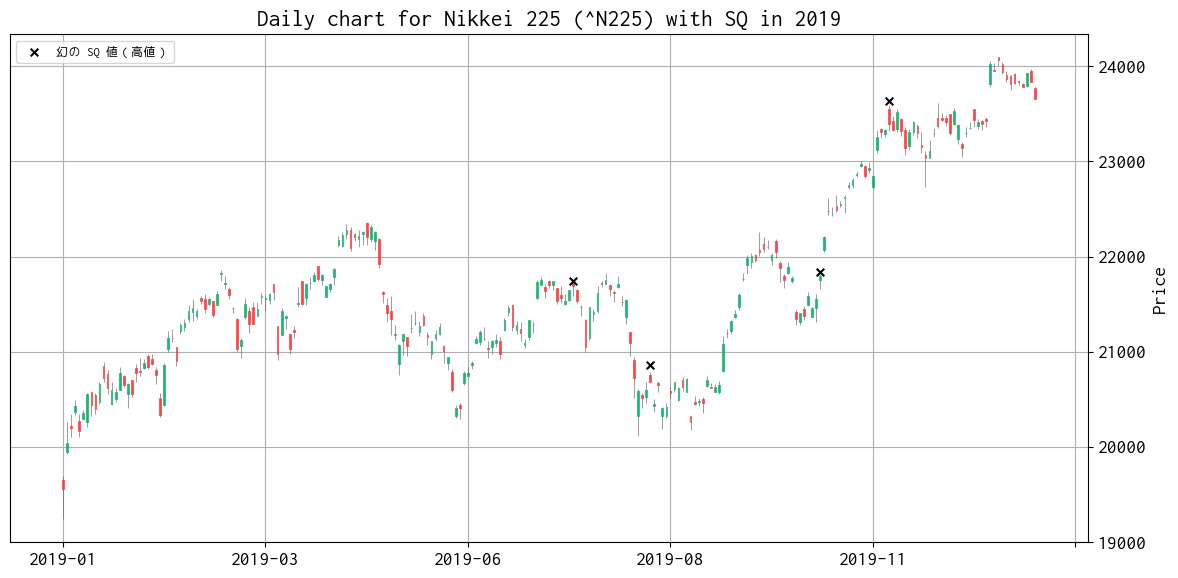

In [21]:
dt_start = pd.to_datetime('2019-01-01 00:00:00+09:00')
dt_end = pd.to_datetime('2020-01-01 00:00:00+09:00')
df_2019 = df_day.loc[(df_day.index > dt_start) & (df_day.index < dt_end)]

FONT_PATH = "fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_2019['SQ'], type='scatter', color='black', marker='x', markersize=30, label='幻の SQ 値（高値）', ax=ax),
]

mpf.plot(
    df_2019,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s) with SQ in 2019' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('2019_daily_chart_n225_sq.png')
plt.show()

### 2020年

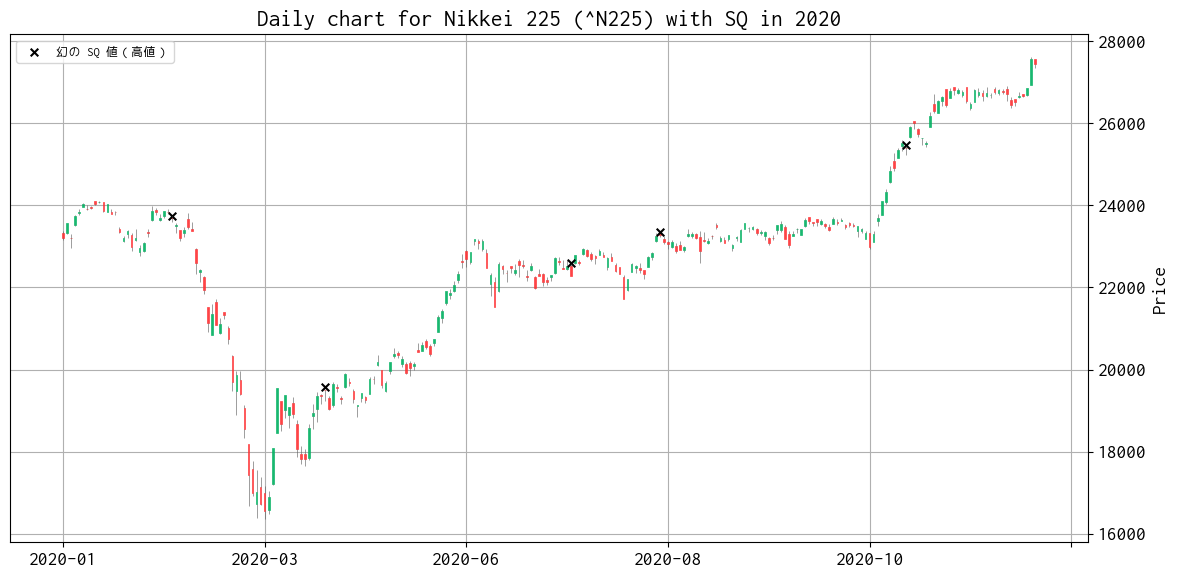

In [22]:
dt_start = pd.to_datetime('2020-01-01 00:00:00+09:00')
dt_end = pd.to_datetime('2021-01-01 00:00:00+09:00')
df_2020 = df_day.loc[(df_day.index > dt_start) & (df_day.index < dt_end)]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_2020['SQ'], type='scatter', color='black', marker='x', markersize=30, label='幻の SQ 値（高値）', ax=ax),
]

mpf.plot(
    df_2020,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s) with SQ in 2020' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('2020_daily_chart_n225_sq.png')
plt.show()

### 2021年

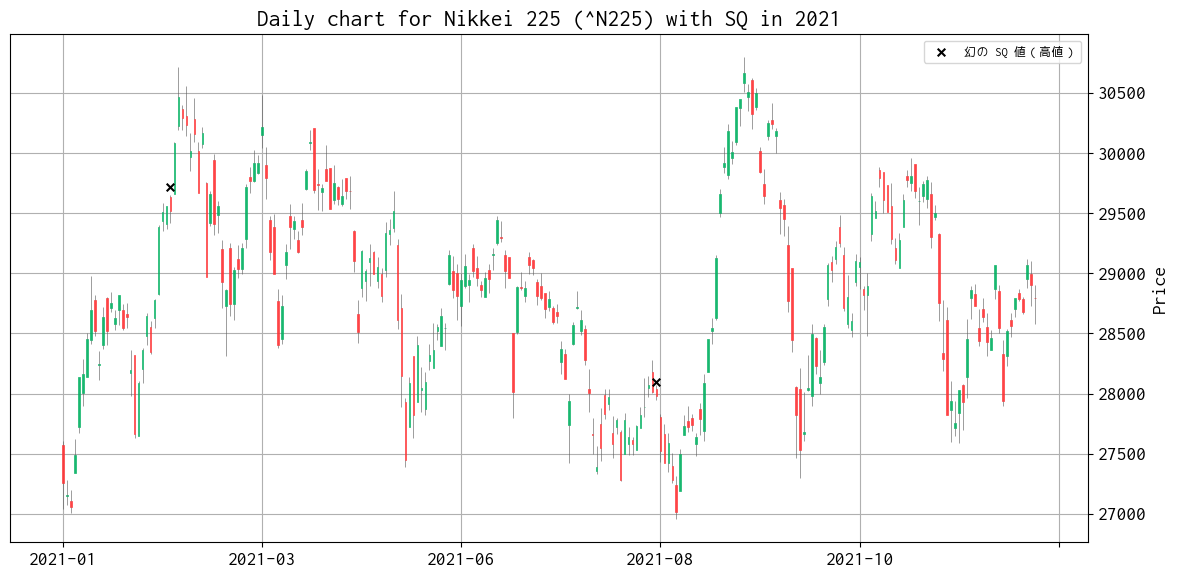

In [23]:
dt_start = pd.to_datetime('2021-01-01 00:00:00+09:00')
dt_end = pd.to_datetime('2022-01-01 00:00:00+09:00')
df_2021 = df_day.loc[(df_day.index > dt_start) & (df_day.index < dt_end)]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_2021['SQ'], type='scatter', color='black', marker='x', markersize=30, label='幻の SQ 値（高値）', ax=ax),
]

mpf.plot(
    df_2021,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s) with SQ in 2021' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('2021_daily_chart_n225_sq.png')
plt.show()

### 2022年

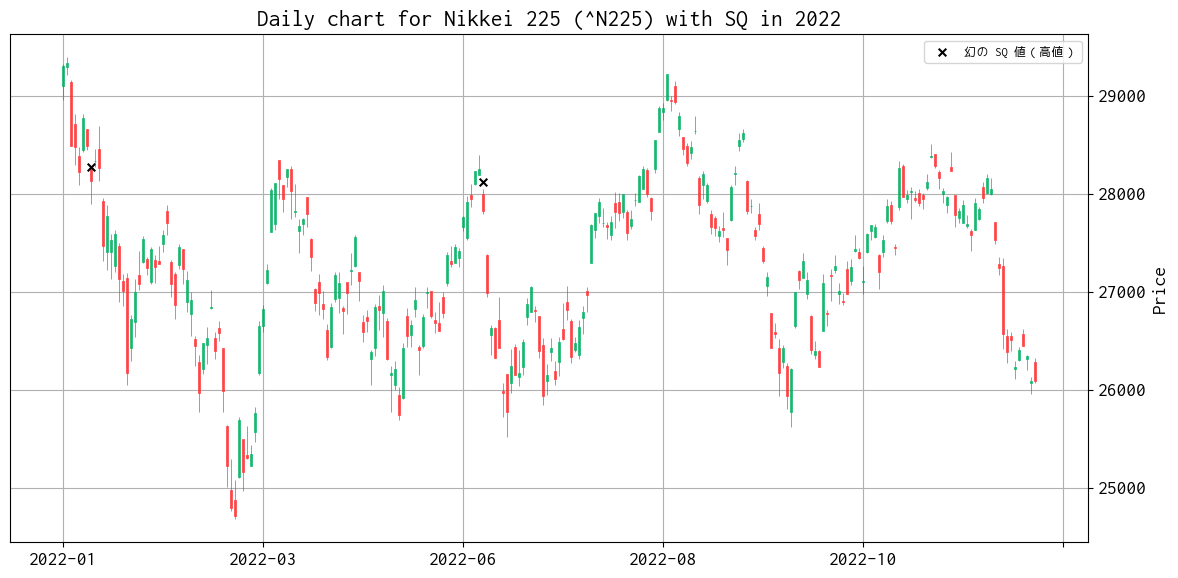

In [24]:
dt_start = pd.to_datetime('2022-01-01 00:00:00+09:00')
dt_end = pd.to_datetime('2023-01-01 00:00:00+09:00')
df_2022 = df_day.loc[(df_day.index > dt_start) & (df_day.index < dt_end)]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_2022['SQ'], type='scatter', color='black', marker='x', markersize=30, label='幻の SQ 値（高値）', ax=ax),
]

mpf.plot(
    df_2022,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s) with SQ in 2022' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('2022_daily_chart_n225_sq.png')
plt.show()

### 2023年

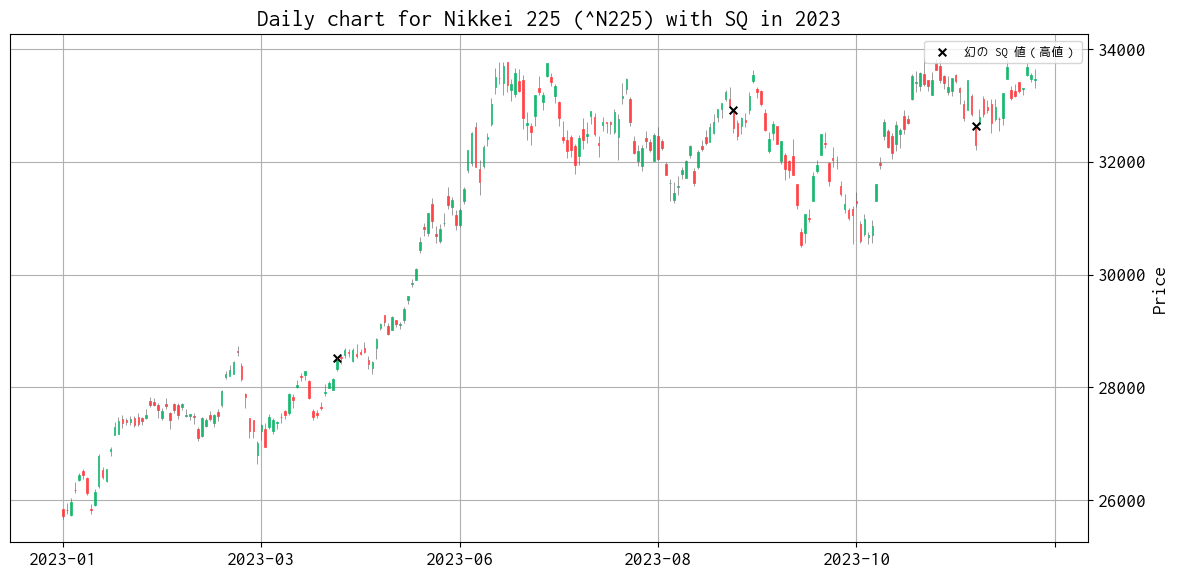

In [25]:
dt_start = pd.to_datetime('2023-01-01 00:00:00+09:00')
dt_end = pd.to_datetime('2024-01-01 00:00:00+09:00')
df_2023 = df_day.loc[(df_day.index > dt_start) & (df_day.index < dt_end)]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_2023['SQ'], type='scatter', color='black', marker='x', markersize=30, label='幻の SQ 値（高値）', ax=ax),
]

mpf.plot(
    df_2023,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s) with SQ in 2023' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('2023_daily_chart_n225_sq.png')
plt.show()

### 2024年

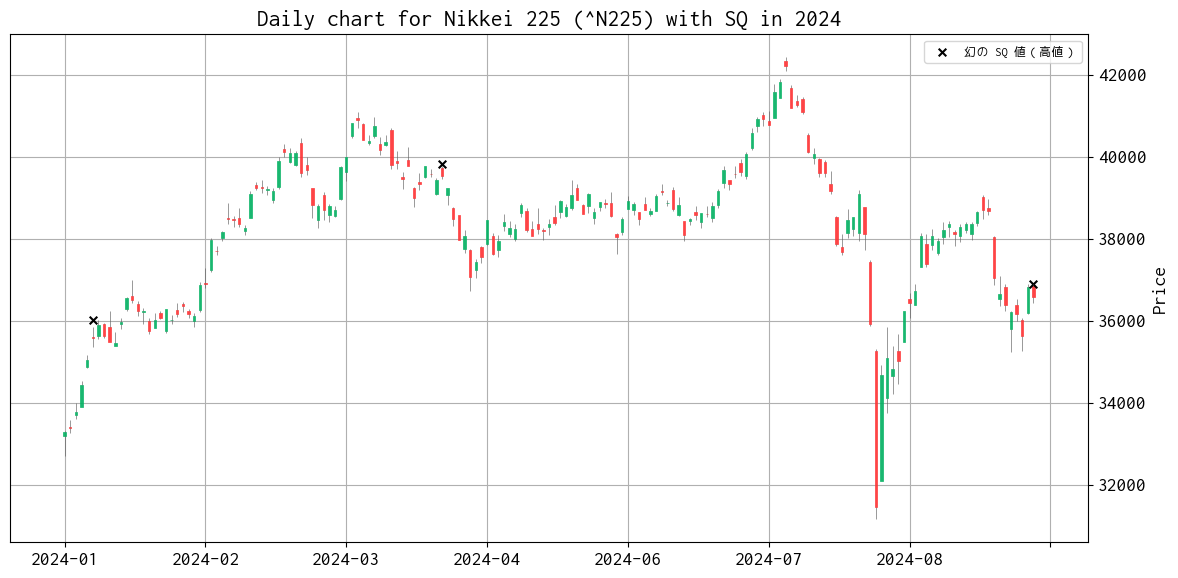

In [26]:
dt_start = pd.to_datetime('2024-01-01 00:00:00+09:00')
dt_end = pd.to_datetime('2025-01-01 00:00:00+09:00')
df_2024 = df_day.loc[(df_day.index > dt_start) & (df_day.index < dt_end)]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_2024['SQ'], type='scatter', color='black', marker='x', markersize=30, label='幻の SQ 値（高値）', ax=ax),
]

mpf.plot(
    df_2024,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s) with SQ in 2024' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('2024_daily_chart_n225_sq.png')
plt.show()